<a href="https://colab.research.google.com/github/harshyadav1508/medium_article_code/blob/main/PCA_Tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [2]:
mnist= tf.keras.datasets.mnist
(X_train_full, y_train_full),(X_test, y_test)=mnist.load_data()

## Reshaping Dataset

In [3]:
data=np.reshape(X_test, (-1, 784))

## Standardization of dataset

In [4]:
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(10000, 784)


## PCA

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


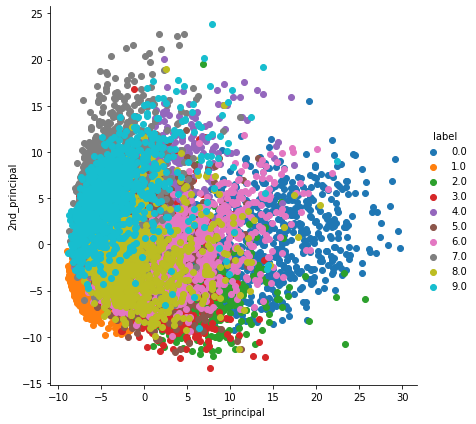

In [5]:
# configuring the parameteres
# the number of components = 2
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)



# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y_test)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## T-sne

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


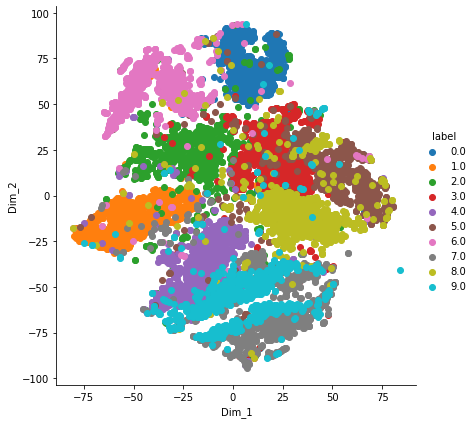

In [8]:
from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data[:10000,:])


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_test[:10000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()